In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
input_size = 784 #28x28 pixels
hidden_size = 500  # can try differnet size
num_classes = 10 # classification of '0 to 9'
num_epochs = 2
batch_size = 100 
learning_rate = 0.001

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./feed_forward_net',train = True,transform=transforms.ToTensor(),download = True)
test_dataset = torchvision.datasets.MNIST(root='./feed_forward_net',train = False,transform=transforms.ToTensor())

print(f'total training dataset is {train_dataset.data.shape}')

total training dataset is torch.Size([60000, 28, 28])


C:\Users\msi\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size=batch_size,shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


## This dataset is photo dataset.That's why it has three dimension.
## [100, 1, 28, 28] means batch_size has 100 samples.
## As it is grey scales, color channel is 1.
## 28x28 is pixel size.


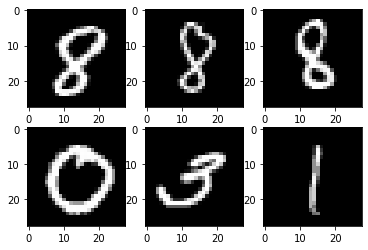

In [6]:
for i in range(6):
    plt.subplot(2,3,i+1)
    #samples[0] will give 3d image. with color channel grey scale.
    #instead of plotting 3d, we can use 2d which is 28x28 with 'plt.imshow' with gray scale.
    plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [8]:
model =NeuralNet(input_size,hidden_size,num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

## Newer versions of PyTorch allows nn.Linear to accept N-D input tensor, the only constraint is that the last dimension of the input tensor will equal in_features of the linear layer.

<span style='color:cyan'>The linear transformation is then applied on the last dimension of the tensor.</span>

<span style='color:cyan'>For instance, if in_features=5 and out_features=10 and the input tensor x has dimensions 2-3-5, then the output tensor will have dimensions 2-3-10.</span>

## len(train_loader) shows the total number of steps to complete the loading of training dataset. train_loader loads batch size of 100 images each times. The total number of images in training dataset is 60000 images. Then, total number of steps would be 60000/100 = 600 

In [9]:
n_total_steps = len(train_loader)
print(f'number of total steps for trainig dataset with {train_dataset.data.shape[0]} images is {n_total_steps} each train loader is loading {batch_size} images')

number of total steps for trainig dataset with 60000 images is 600 each train loader is loading 100 images


In [10]:
for epoch in range(num_epochs):
    for i, (images,labels)  in enumerate(train_loader):
        # input size is 28x28 = 784 
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs},step{i+1}/{n_total_steps},loss = {loss.item():.3f}')


epoch 1/2,step100/600,loss = 0.327
epoch 1/2,step200/600,loss = 0.329
epoch 1/2,step300/600,loss = 0.310
epoch 1/2,step400/600,loss = 0.178
epoch 1/2,step500/600,loss = 0.167
epoch 1/2,step600/600,loss = 0.131
epoch 2/2,step100/600,loss = 0.142
epoch 2/2,step200/600,loss = 0.203
epoch 2/2,step300/600,loss = 0.036
epoch 2/2,step400/600,loss = 0.092
epoch 2/2,step500/600,loss = 0.138
epoch 2/2,step600/600,loss = 0.092


In [11]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # value, index will return
        _, predictions = torch.max(outputs.data,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()   
    
    
    acc = 100.0 * n_correct/n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')     
        

Accuracy of the network on the 10000 test images: 96.98 %
